In [2]:
import GetOldTweets3 as got

text_query = 'AceHardware'
count = 2000
# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                            .setMaxTweets(count)
# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
# Creating list of chosen tweet data
text_tweets = [[tweet.date, tweet.text] for tweet in tweets]

In [24]:
import pandas as pd
df = DataFrame(text_tweets).rename(columns={0: 'date',
                                            1: 'tweet'})
df

,date,tweet
0,2020-04-29 00:43:15+00:00,Btw i ended up @AceHardware for toilet paper b...
1,2020-04-29 00:28:29+00:00,@HomeDepot @Lowes @Menards @AceHardware
2,2020-04-28 23:40:55+00:00,WE CAN DO IT!! We just need to plan and keep e...
3,2020-04-28 23:22:14+00:00,Just walked to my local @AceHardware on Clemen...
4,2020-04-28 23:20:25+00:00,Final stage of the rain garden... getting the ...
...,...,...
1995,2020-03-21 15:28:00+00:00,Ever try to unsubscribe emails from @AceHardwa...
1996,2020-03-21 15:27:00+00:00,We asked @TobyKeith a few questions about his ...
1997,2020-03-21 15:14:59+00:00,Thanks to @acehardware I got more seed startin...
1998,2020-03-21 14:48:16+00:00,"pepperoni, 1/2 with banana peppers=my jam!"


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
from textblob import TextBlob
get_ipython().system('pip3 install -U textblob')
get_ipython().system('python3 -m textblob.download_corpora')
from textblob import TextBlob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
     |████████████████████████████████| 1.4 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 3.8 MB/s  eta 0:00:01
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
     |████████████████████████████████| 695 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 4.0 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=17dfc4a972917e0cba79847c39ded2e8223a5f1438f25e8f3954bf01d855916e
  Stored in directory: /Users/justinpassek/Library/Caches/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
  Created wheel for regex: filename=regex-2020.4.4-cp37-cp37m-macosx_10_15_x86_64.whl size=286711 sha256=db17464bdca5742abba718fc912a0c76d5b2c10c323b3dfd1481eec271a61084
  Stored in directory: /Users/justinpassek/Library/Caches/pip/wheels/52/98/5c/8d5d7a5321d2de463dfc6f7b32aab8b16e564cfce553b28daf
Successfully built nltk regex
[nltk

In [27]:
df['Original_tweet'] = df['tweet']
print(df)

                          date  \
0    2020-04-29 00:43:15+00:00   
1    2020-04-29 00:28:29+00:00   
2    2020-04-28 23:40:55+00:00   
3    2020-04-28 23:22:14+00:00   
4    2020-04-28 23:20:25+00:00   
...                        ...   
1995 2020-03-21 15:28:00+00:00   
1996 2020-03-21 15:27:00+00:00   
1997 2020-03-21 15:14:59+00:00   
1998 2020-03-21 14:48:16+00:00   
1999 2020-03-21 14:40:29+00:00   

                                                  tweet  \
0     Btw i ended up @AceHardware for toilet paper b...   
1              @HomeDepot @Lowes @Menards @AceHardware    
2     WE CAN DO IT!! We just need to plan and keep e...   
3     Just walked to my local @AceHardware on Clemen...   
4     Final stage of the rain garden... getting the ...   
...                                                 ...   
1995  Ever try to unsubscribe emails from @AceHardwa...   
1996  We asked @TobyKeith a few questions about his ...   
1997  Thanks to @acehardware I got more seed startin...   
1

In [28]:
## Convert to string
df['tweet'] = df['tweet'].astype(str)

## Before lowercasing 
df['tweet'][2]

## Lowercase all reviews
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'][2] ## to see the difference

## Removing punctuation
df['tweet']=df['tweet'].str.replace(r'[^\w\s]', '')

df.head()

,date,tweet,Original_tweet
0,2020-04-29 00:43:15+00:00,btw i ended up acehardware for toilet paper be...,Btw i ended up @AceHardware for toilet paper b...
1,2020-04-29 00:28:29+00:00,homedepot lowes menards acehardware,@HomeDepot @Lowes @Menards @AceHardware
2,2020-04-28 23:40:55+00:00,we can do it we just need to plan and keep eve...,WE CAN DO IT!! We just need to plan and keep e...
3,2020-04-28 23:22:14+00:00,just walked to my local acehardware on clement...,Just walked to my local @AceHardware on Clemen...
4,2020-04-28 23:20:25+00:00,final stage of the rain garden getting the lan...,Final stage of the rain garden... getting the ...


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinpassek/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,date,tweet,Original_tweet
0,2020-04-29 00:43:15+00:00,btw ended acehardware toilet paper 2 safeways ...,Btw i ended up @AceHardware for toilet paper b...
1,2020-04-29 00:28:29+00:00,homedepot lowes menards acehardware,@HomeDepot @Lowes @Menards @AceHardware
2,2020-04-28 23:40:55+00:00,need plan keep everyone safe,WE CAN DO IT!! We just need to plan and keep e...
3,2020-04-28 23:22:14+00:00,walked local acehardware clement st pleasant e...,Just walked to my local @AceHardware on Clemen...
4,2020-04-28 23:20:25+00:00,final stage rain garden getting landscaping do...,Final stage of the rain garden... getting the ...


In [33]:
## Stemmer
st = PorterStemmer()
df['tweet'] = df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

,date,tweet,Original_tweet
0,2020-04-29 00:43:15+00:00,btw end acehardwar toilet paper 2 safeway 2 ta...,Btw i ended up @AceHardware for toilet paper b...
1,2020-04-29 00:28:29+00:00,homedepot low menard acehardwar,@HomeDepot @Lowes @Menards @AceHardware
2,2020-04-28 23:40:55+00:00,need plan keep everyon safe,WE CAN DO IT!! We just need to plan and keep e...
3,2020-04-28 23:22:14+00:00,walk local acehardwar clement st pleasant expe...,Just walked to my local @AceHardware on Clemen...
4,2020-04-28 23:20:25+00:00,final stage rain garden get landscap done glad...,Final stage of the rain garden... getting the ...


In [34]:
def polarity(x):
    return TextBlob(x).sentiment.polarity  

def subjectivity(x):
    return TextBlob(x).sentiment.subjectivity

df['Polarity'] = df['tweet'].apply(polarity)
df['Subjectivity'] = df['tweet'].apply(subjectivity)
# The first score is Polarity on a scale of 0 to 1. 0 is neg, 1 is pos
# The second score is Subjectivity on a scale of 0 to 1. 0 is Factual information and 1 is Public information

df.head()

,date,tweet,Original_tweet,Polarity,Subjectivity
0,2020-04-29 00:43:15+00:00,btw end acehardwar toilet paper 2 safeway 2 ta...,Btw i ended up @AceHardware for toilet paper b...,-0.022222,0.000000
1,2020-04-29 00:28:29+00:00,homedepot low menard acehardwar,@HomeDepot @Lowes @Menards @AceHardware,0.000000,0.300000
2,2020-04-28 23:40:55+00:00,need plan keep everyon safe,WE CAN DO IT!! We just need to plan and keep e...,0.500000,0.500000
3,2020-04-28 23:22:14+00:00,walk local acehardwar clement st pleasant expe...,Just walked to my local @AceHardware on Clemen...,0.366667,0.483333
4,2020-04-28 23:20:25+00:00,final stage rain garden get landscap done glad...,Final stage of the rain garden... getting the ...,0.250000,1.000000


In [36]:
#Fetch wordcount for each abstract
df['word_count'] = df['Original_tweet'].apply(lambda x: len(str(x).split(" ")))
df.head()

,date,tweet,Original_tweet,Polarity,Subjectivity,word_count
0,2020-04-29 00:43:15+00:00,btw end acehardwar toilet paper 2 safeway 2 ta...,Btw i ended up @AceHardware for toilet paper b...,-0.022222,0.000000,36
1,2020-04-29 00:28:29+00:00,homedepot low menard acehardwar,@HomeDepot @Lowes @Menards @AceHardware,0.000000,0.300000,5
2,2020-04-28 23:40:55+00:00,need plan keep everyon safe,WE CAN DO IT!! We just need to plan and keep e...,0.500000,0.500000,14
3,2020-04-28 23:22:14+00:00,walk local acehardwar clement st pleasant expe...,Just walked to my local @AceHardware on Clemen...,0.366667,0.483333,29
4,2020-04-28 23:20:25+00:00,final stage rain garden get landscap done glad...,Final stage of the rain garden... getting the ...,0.250000,1.000000,36


In [37]:
##Descriptive statistics of word counts
df.word_count.describe()

count    2000.000000
mean       21.684000
std        14.485996
min         1.000000
25%         9.000000
50%        20.000000
75%        33.000000
max        60.000000
Name: word_count, dtype: float64

In [41]:
#Identify common words
freq = pd.Series(' '.join(df['Original_tweet']).split()).value_counts()[:20]
freq

freq_clean = pd.Series(' '.join(df['tweet']).split()).value_counts()#[:30]
freq_clean = pd.DataFrame(freq_clean)

freq_clean

,0
acehardwar,1331
store,270
low,215
homedepot,210
ace,203
...,...
freemichigannow,1
joespizza,1
forest,1
daughter,1


In [40]:
#Identify uncommon words
freq_uncommon =  pd.Series(' '.join(df['tweet']).split()).value_counts()[-20:]
freq_uncommon

porch                                                         1
helpingoth                                                    1
platform                                                      1
mm                                                            1
cantwont                                                      1
locallyown                                                    1
borisjohnson                                                  1
elit                                                          1
barrett                                                       1
closet                                                        1
excess                                                        1
httpswwwmichigangovwhitmer09309738790499_9070552518200html    1
quarantinediari                                               1
social_distanc                                                1
dilepeh                                                       1
freemichigannow                         

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(df['tweet'])

[Text(0, 0, 'acehardwar'),
 Text(0, 0, 'store'),
 Text(0, 0, 'low'),
 Text(0, 0, 'homedepot'),
 Text(0, 0, 'ace'),
 Text(0, 0, 'get'),
 Text(0, 0, 'hardwar'),
 Text(0, 0, 'local'),
 Text(0, 0, 'thank'),
 Text(0, 0, 'go'),
 Text(0, 0, 'order'),
 Text(0, 0, 'mask'),
 Text(0, 0, 'need'),
 Text(0, 0, 'home'),
 Text(0, 0, 'like'),
 Text(0, 0, 'help'),
 Text(0, 0, 'time'),
 Text(0, 0, 'amp'),
 Text(0, 0, 'im'),
 Text(0, 0, 'peopl')]

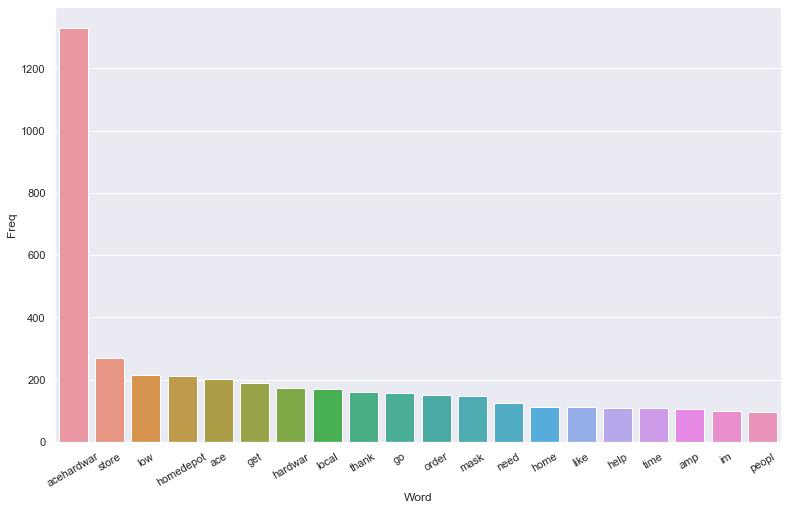

In [44]:
Review = df['tweet']
#Most frequently occuring words
def get_top_n_words(Review, n=None):
    vec = CountVectorizer().fit(Review)
    bag_of_words = vec.transform(Review)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(Review, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0            ace hardwar    88
1         low acehardwar    85
2       local acehardwar    63
3          hardwar store    59
4          homedepot low    55
5   homedepot acehardwar    55
6          low homedepot    41
7         curbsid pickup    37
8          di acehardwar    34
9       acehardwar store    30
10              n95 mask    26
11         custom servic    23
12        acehardwar low    23
13             wear mask    22
14      thank acehardwar    20
15        social distanc    20
16   acehardwar truevalu    19
17            home depot    19
18           onlin order    18
19           order onlin    16


[Text(0, 0, 'ace hardwar'),
 Text(0, 0, 'low acehardwar'),
 Text(0, 0, 'local acehardwar'),
 Text(0, 0, 'hardwar store'),
 Text(0, 0, 'homedepot low'),
 Text(0, 0, 'homedepot acehardwar'),
 Text(0, 0, 'low homedepot'),
 Text(0, 0, 'curbsid pickup'),
 Text(0, 0, 'di acehardwar'),
 Text(0, 0, 'acehardwar store'),
 Text(0, 0, 'n95 mask'),
 Text(0, 0, 'custom servic'),
 Text(0, 0, 'acehardwar low'),
 Text(0, 0, 'wear mask'),
 Text(0, 0, 'thank acehardwar'),
 Text(0, 0, 'social distanc'),
 Text(0, 0, 'acehardwar truevalu'),
 Text(0, 0, 'home depot'),
 Text(0, 0, 'onlin order'),
 Text(0, 0, 'order onlin')]

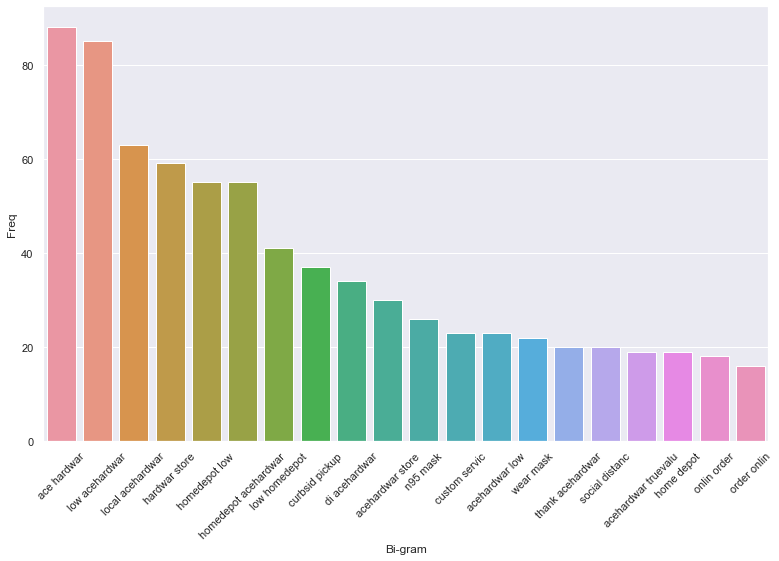

In [45]:
Review = df['tweet']
#Most frequently occuring Bi-grams
def get_top_n2_words(Review, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(Review)
    bag_of_words = vec1.transform(Review)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(Review, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#top2_df.to_csv('West_Sydney_Total_Bi-Gram.csv')
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                        Tri-gram  Freq
0                       homedepot low acehardwar    40
1                       low homedepot acehardwar    22
2   northeastbuildingsuppli sipspaint acehardwar    15
3                             beli di acehardwar    12
4                      revel revellac acehardwar    11
5                              ace hardwar store    10
6                                   give us call    10
7                            local hardwar store     9
8                       homedepot acehardwar low     9
9                acehardwar truevalu homeremodel     7
10               truevalu homeremodel outdoorliv     7
11                    onsalenow redhotbuy oakdal     7
12                   redhotbuy oakdal acehardwar     7
13                     acehardwar curbsid pickup     7
14                                 car suv truck     7
15                              train ship arrow     7
16                             ship arrow bullet     7
17        

[Text(0, 0, 'homedepot low acehardwar'),
 Text(0, 0, 'low homedepot acehardwar'),
 Text(0, 0, 'northeastbuildingsuppli sipspaint acehardwar'),
 Text(0, 0, 'beli di acehardwar'),
 Text(0, 0, 'revel revellac acehardwar'),
 Text(0, 0, 'ace hardwar store'),
 Text(0, 0, 'give us call'),
 Text(0, 0, 'local hardwar store'),
 Text(0, 0, 'homedepot acehardwar low'),
 Text(0, 0, 'acehardwar truevalu homeremodel'),
 Text(0, 0, 'truevalu homeremodel outdoorliv'),
 Text(0, 0, 'onsalenow redhotbuy oakdal'),
 Text(0, 0, 'redhotbuy oakdal acehardwar'),
 Text(0, 0, 'acehardwar curbsid pickup'),
 Text(0, 0, 'car suv truck'),
 Text(0, 0, 'train ship arrow'),
 Text(0, 0, 'ship arrow bullet'),
 Text(0, 0, 'target seveneleven samsclub'),
 Text(0, 0, 'seveneleven samsclub walmart'),
 Text(0, 0, 'samsclub walmart advanceautopart')]

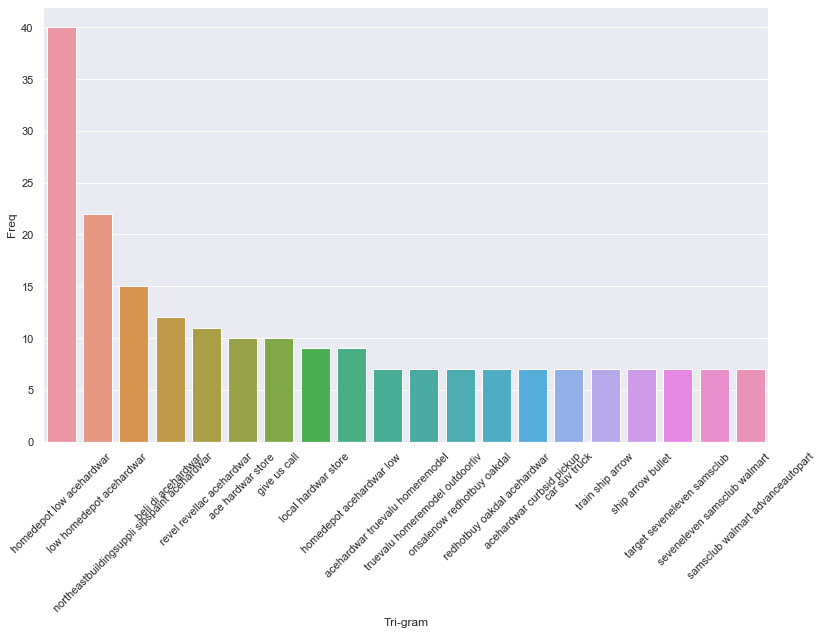

In [47]:
Review = df['tweet']
#Most frequently occuring Tri-grams
def get_top_n3_words(Review, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(Review)
    bag_of_words = vec1.transform(Review)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(Review, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#top3_df.to_csv('Waldorf_Shanghai_Total_Tri-Gram.csv')
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=Review[22]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [49]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
acehardwar agent current busyfor almost two fing hour call bullshit feel sorri whoever pick call im fume

Keywords:
call 0.392
pick call im 0.35
pick call 0.35
whoever 0.332
sorri 0.279


In [50]:
df

,date,tweet,Original_tweet,Polarity,Subjectivity,word_count
0,2020-04-29 00:43:15+00:00,btw end acehardwar toilet paper 2 safeway 2 ta...,Btw i ended up @AceHardware for toilet paper b...,-0.022222,0.000000,36
1,2020-04-29 00:28:29+00:00,homedepot low menard acehardwar,@HomeDepot @Lowes @Menards @AceHardware,0.000000,0.300000,5
2,2020-04-28 23:40:55+00:00,need plan keep everyon safe,WE CAN DO IT!! We just need to plan and keep e...,0.500000,0.500000,14
3,2020-04-28 23:22:14+00:00,walk local acehardwar clement st pleasant expe...,Just walked to my local @AceHardware on Clemen...,0.366667,0.483333,29
4,2020-04-28 23:20:25+00:00,final stage rain garden get landscap done glad...,Final stage of the rain garden... getting the ...,0.250000,1.000000,36
...,...,...,...,...,...,...
1995,2020-03-21 15:28:00+00:00,ever tri unsubscrib email acehardwar imposs jerk,Ever try to unsubscribe emails from @AceHardwa...,0.000000,0.000000,12
1996,2020-03-21 15:27:00+00:00,ask tobykeith question recent time play acesho...,We asked @TobyKeith a few questions about his ...,0.000000,0.250000,41
1997,2020-03-21 15:14:59+00:00,thank acehardwar got seed start soil samsclub ...,Thanks to @acehardware I got more seed startin...,0.500000,0.500000,36
1998,2020-03-21 14:48:16+00:00,pepperoni 12 banana peppersmi jam,"pepperoni, 1/2 with banana peppers=my jam!",0.000000,0.000000,6


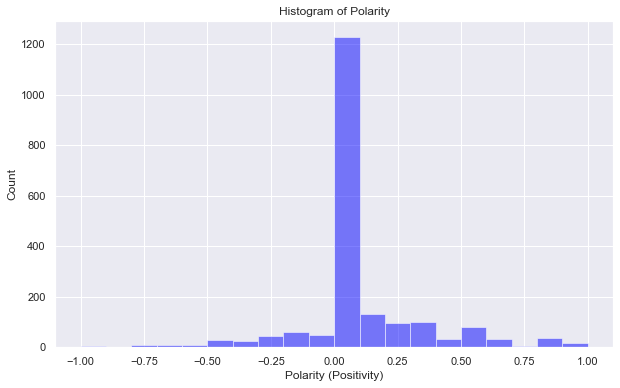

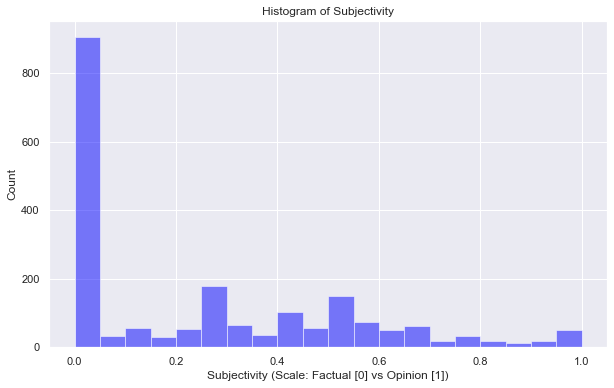

In [51]:
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity (Positivity)')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()

num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.Subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity (Scale: Factual [0] vs Opinion [1])')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

In [54]:
import numpy as np
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)
B

array([[-2.59150577],
       [-0.95906797],
       [-0.91787224],
       [ 1.69029248]])